<a href="https://colab.research.google.com/github/emrullahozkilinc/machine-learning/blob/master/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

In [2]:
inputs = [[1.2, 5.1, 2.1, 4.1],
          [5.2, 6.9, 2.8, 5.1],
          [9.1, 3.6, 2.7, 2.1]]

weights = [[-3.1, 2.1, 9, -2.8],
           [5.5, -7.2, 9.8, 7.9],
           [4.3, 6.1, 3.5, -5.4]]
           
bias = [5, 6, 2]

weights2 = [[5.2, -6.7, 9.1],
           [-5.5, 5.1, 6.4],
           [4.13, 4.3, 3.5]]
           
bias2 = [-5, 4.6, 9]

In [4]:
def createData(N,K):
  X = np.zeros((N*K,2)) # data matrix (each row = single example)
  y = np.zeros(N*K, dtype='uint8') # class labels
  for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
  return X, y

In [5]:
def figureData(X):
  plt.figure(figsize=(9,7))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.show()

In [6]:
def sigmoid(arr):
  return 1/(1+np.exp(-arr))

In [7]:
def relu(arr):
  return np.maximum(0,arr)

In [8]:
def step(arr):
  return np.heaviside(arr,0.5)

In [15]:
def soft_max(arr):
  exponantialized = np.exp(arr)
  exponantialized = exponantialized - np.max(exponantialized, axis=1, keepdims=True)
  return normalize(exponantialized)

In [13]:
def normalize(arr):
  return (arr / np.sum(arr, axis=1, keepdims=True))

In [16]:
class Dense:
  def __init__(self, input_size, neuron_size, act_func):
    self.weights=np.random.randn(input_size, neuron_size)
    self.biasses=np.random.randint(-2, 1, (1,neuron_size))
    self.act_func=act_func
  def forward(self, input):
    try:
      self.output=np.dot(input,self.weights)+self.biasses
      self.output=self.act_func(np.asarray(self.output))
    except TypeError:
      print('İleri yayılımda hata.')
      pass

In [17]:
layer1=Dense(4,32,step)
layer2=Dense(32,16,np.tanh)
layer3=Dense(16,1,np.tanh)

layer1.forward(inputs)
layer2.forward(layer1.output)
layer3.forward(layer2.output)

layer3.output

array([[0.9999929 ],
       [0.99999652],
       [0.99352039]])

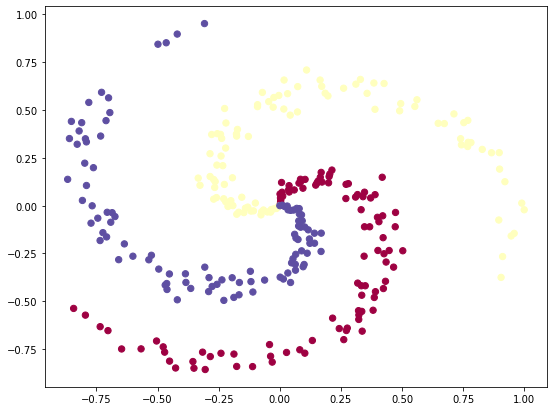

In [18]:
X, y = createData(100,3)
figureData(X)

In [19]:
layer=Dense(2,5,soft_max)
layer.forward(X)

layer.output

array([[-0.        , -0.        ,  0.33333333,  0.33333333,  0.33333333],
       [-0.        ,  0.00087233,  0.33246833,  0.33340082,  0.33325853],
       [-0.        ,  0.0012308 ,  0.33178259,  0.33363385,  0.33335276],
       ...,
       [ 0.152765  , -0.        ,  0.23104598,  0.31202641,  0.30416261],
       [ 0.13834363, -0.        ,  0.22531691,  0.322524  ,  0.31381545],
       [ 0.1136123 , -0.        ,  0.21912543,  0.33849158,  0.32877068]])